In [1]:
library(ggplot2)
library(cluster)

# Clustering

## Comparing Clusters

<div>
<img src="../img/comparingClusters.png" width=50%/>
</div>

### Centroids

$$c(A) = \frac{1}{|A|}\sum_{x \in A} x$$

Distance between two clusters is:

$$d(C_1, C_2) = d(c(C_1), c(C_2))$$

### UPGMA - unweighted pair group method with arithmetic mean

$$d(C_1, C_2) = \frac{1}{|C_1| \times |C_2|}\sum_{x \in C_1}\sum_{y \in C_2}d(x,y)$$

## Hierarchical Clustering

The algorithm works as follows:

* Put each data point in its own cluster.
* Identify the closest two clusters and combine them into one cluster.
* Repeat the above step till all the data points are in a single cluster.

In [2]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

In [3]:
head(iris[,3:4])

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2
6,1.7,0.4


`hclust()` syntax: `hclust(data, method)`, where `data` is a dissimilarity structure

In [4]:
d = dist(iris[, 3:4], method = "euclidean")
# the object d stores the distances between every point and every other point, it will print a ton of numbers!
# d

In general, for a data sample of size M, the distance matrix is an M × M symmetric matrix with M × (M - 1)∕2 distinct elements. Hence for a data sample of size 150 (the number of observations in `iris`), its distance matrix has about 11,000 distinct elements.

In [5]:
clusters1 <- hclust(d) #defaults to complete linkage method (not covered)
clusters1 # object of class hclust


Call:
hclust(d = d)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 150 


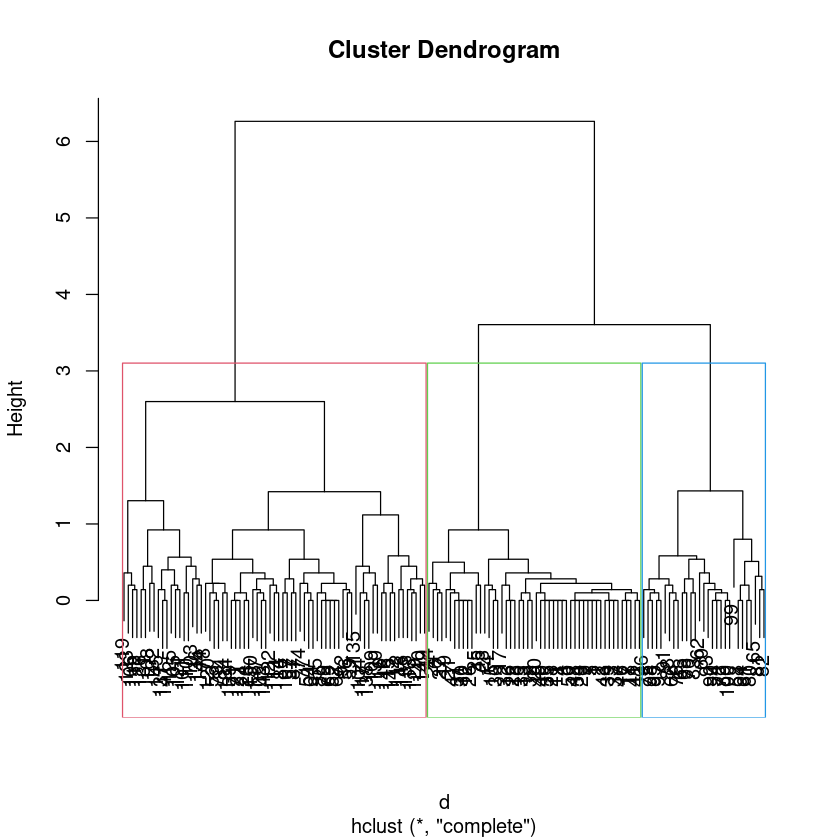

In [6]:
plot(clusters1)
rect.hclust(clusters1 , k = 3, border = 2:6)

In [7]:
clusterCut1 <- cutree(clusters1, 3)
clusterCut1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 3 2 3 3 3 3 2 3 3 2 3 2 3 2 3 2 2
 [75] 3 3 2 2 2 3 3 3 3 2 2 2 2 3 3 3 3 2 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

In [8]:
table(clusterCut1, iris$Species)

           
clusterCut1 setosa versicolor virginica
          1     50          0         0
          2      0         21        50
          3      0         29         0

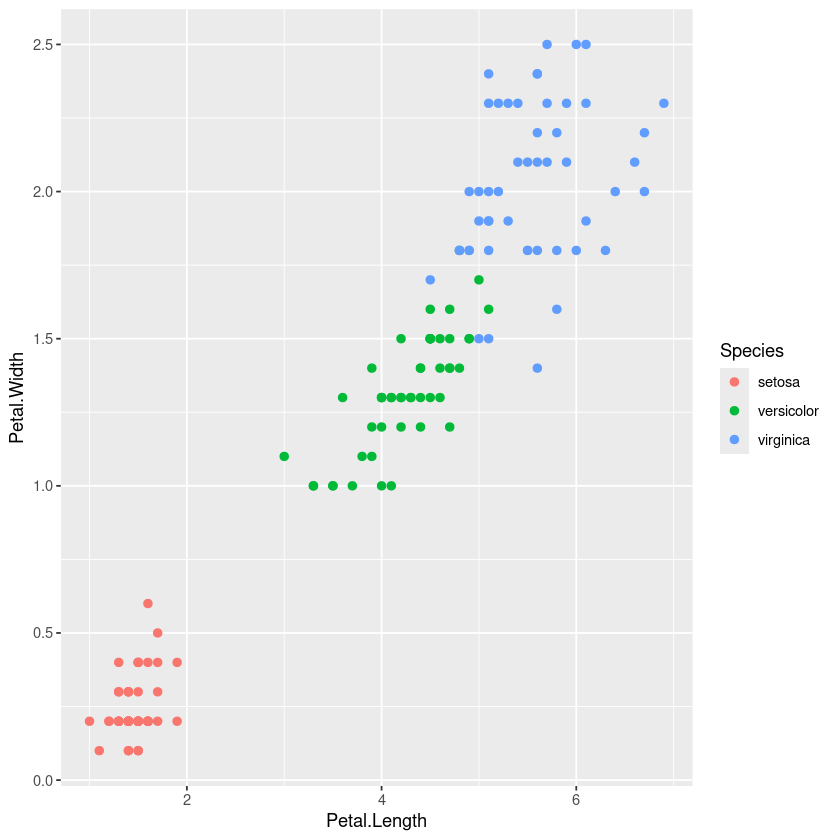

In [9]:
ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) + geom_point(size = 2)

### Question

Let's see if using a different clustering method will give better results. Try the `average` method on your own (add the argument `method` to the `hclust` function). Plot the respective dendogram. Compare cluster membership among k=3 clusters and the members between species.

## K-means Clustering

In k means clustering, we have to specify the number of clusters, $k$, we want the data to be grouped into. The algorithm randomly picks $k$ observations and assigns them each to their own cluster. These points are the centroids of their clusters. Then, the algorithm iterates through two steps:
* Reassign data points to the cluster whose centroid is closest.
* Calculate new centroid of each cluster.

These two steps are repeated till the within cluster variation cannot be reduced any further. 

`kmeans()` syntax: `kmeans(data, centers)`

In [10]:
set.seed(20) #ensures everyone gets the same results
kCluster <- kmeans(iris[, 3:4], 3, nstart = 20)
kCluster

K-means clustering with 3 clusters of sizes 52, 48, 50

Cluster means:
  Petal.Length Petal.Width
1     4.269231    1.342308
2     5.595833    2.037500
3     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
[112] 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 13.05769 16.29167  2.02200
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [11]:
kCluster$tot.withinss

[1] 31.37136

In [12]:
table(kCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         48         4
  2      0          2        46
  3     50          0         0

As we can see, the data belonging to the setosa species got grouped into cluster 3, versicolor into cluster 1, and virginica into cluster 2. The algorithm wrongly classified two data points belonging to versicolor and four data points belonging to virginica.

We can also plot the data to see the clusters:

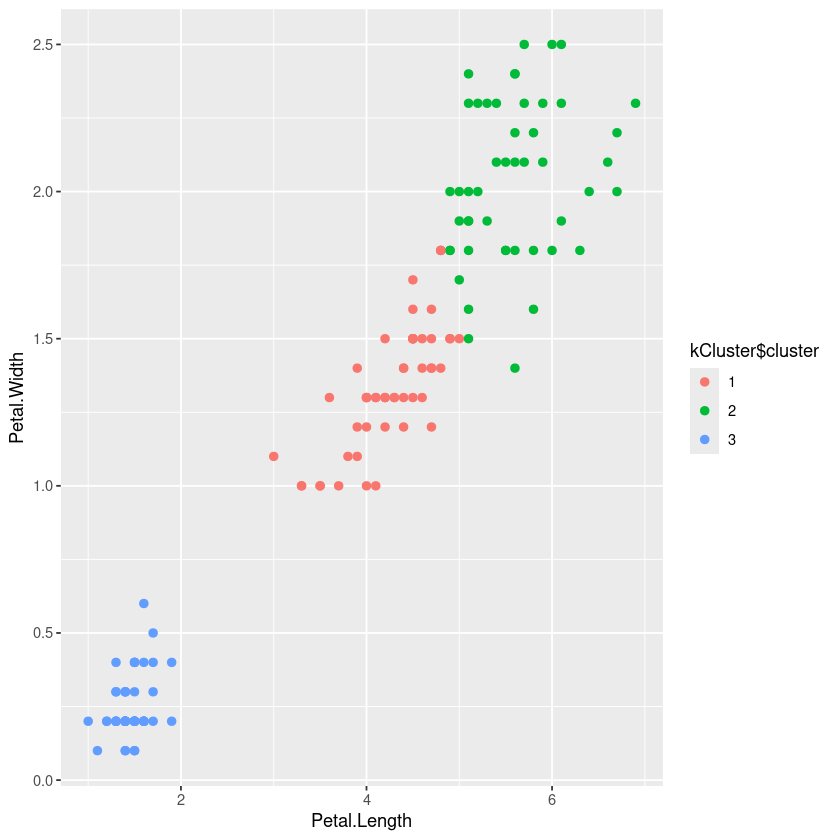

In [13]:
kCluster$cluster <- as.factor(kCluster$cluster)
ggplot(iris, aes(Petal.Length, Petal.Width, color = kCluster$cluster)) + geom_point(size = 2)

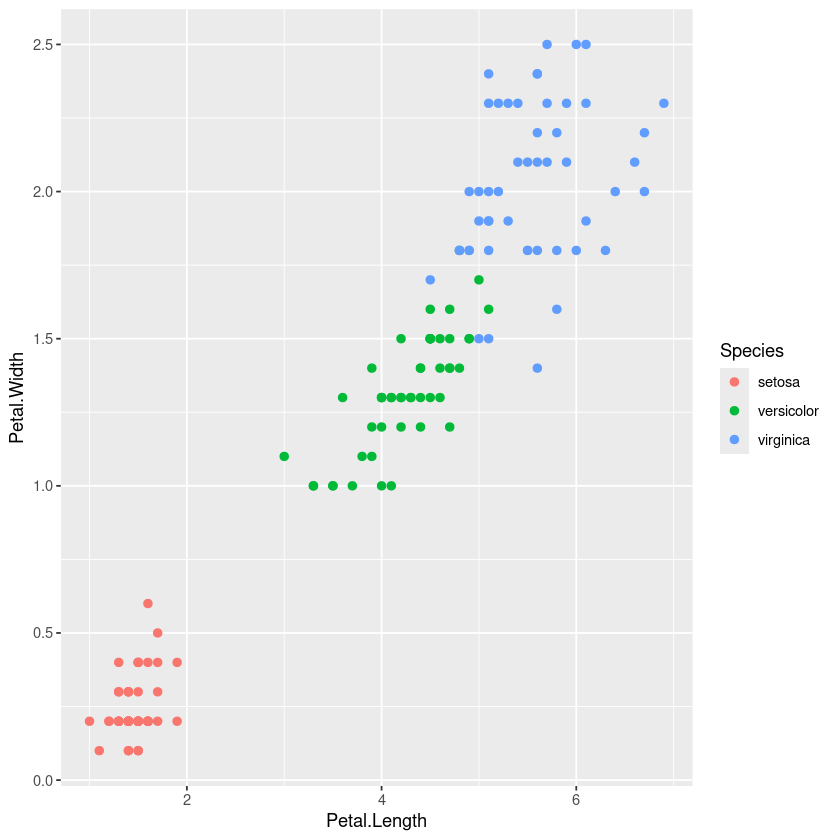

In [14]:
ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) + geom_point(size = 2)

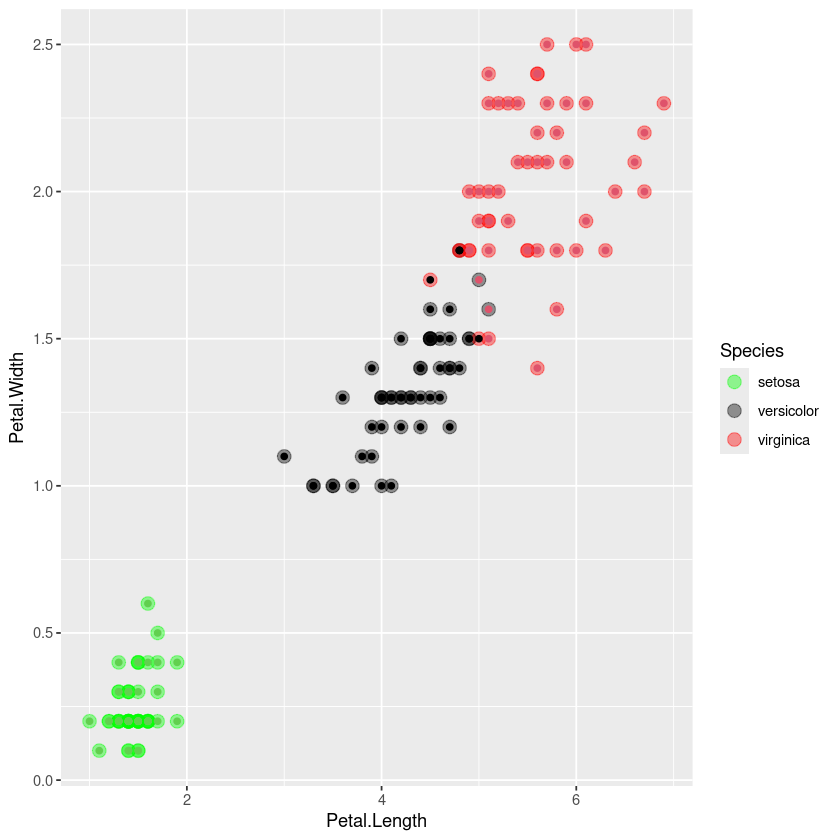

In [15]:
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) +
    geom_point(alpha = 0.4, size = 3.5) + geom_point(col = kCluster$cluster) +
    scale_color_manual(values = c('green', 'black', 'red'))


### Determining optimal number of clusters (k)

#### Elbow Plot

$$TWCSS = \sum_{i=1}^k\sum_{x \in C_i}(x-\mu_i)^2$$
$$\mu_i = c(C_i)$$

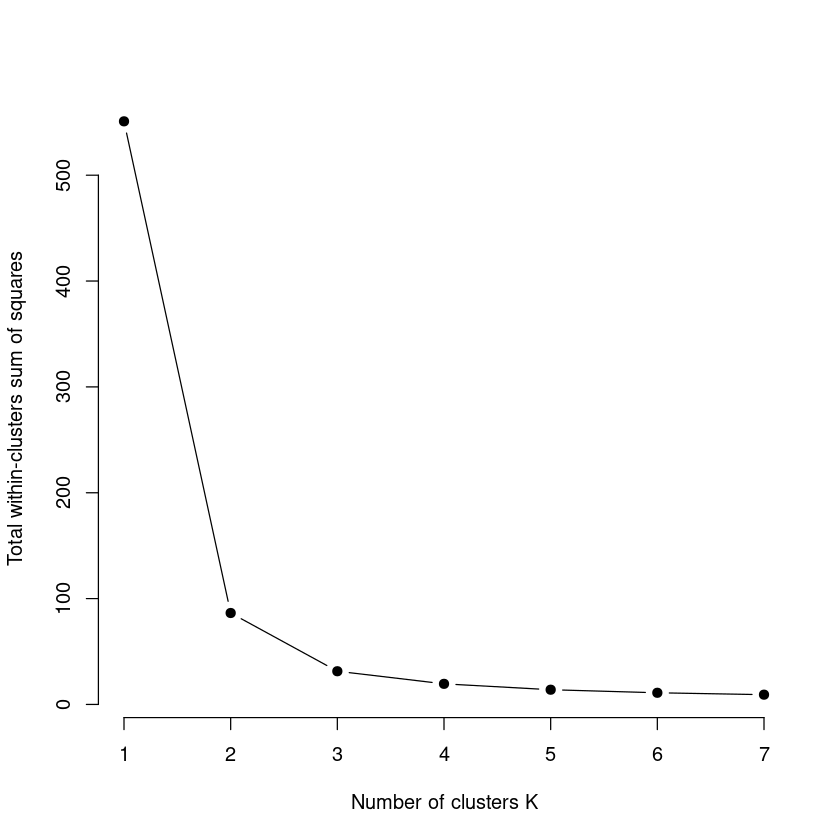

In [16]:
#Elbow Method for finding the optimal number of clusters
# Compute and plot wss for k = 1 to k = 7.
k.max <- 7 #max 150 (num of obs)
twcss <- sapply(1:k.max, 
              function(k){kmeans(iris[, 3:4], k, nstart=20)$tot.withinss})

plot(1:k.max, twcss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")


#### Silhouette Score

$$a(x) = \frac{1}{|C_i|-1}\sum_{y \in C_i, x \neq y}d(x,y)$$
$$b(x) = min_{k \neq i}\big(\frac{1}{|C_i|}\sum_{y \in C_k}d(x,y)\big)$$
$$s(x) = \begin{cases} \frac{b(x)-a(x)}{max(a(x),b(x))}, & \text{if $|C_i| > 1$}.\\ 0, & \text{if $|C_i| = 1$}. \end{cases}$$

The silhouette *score* is the $mean(s(x))$ for all $x$.

In [17]:
k=3
km <- kmeans(iris[, 3:4], centers = k, nstart=20)
ss <- silhouette(km$cluster, dist(iris[, 3:4], "euclidean"))
ss

       cluster neighbor    sil_width
  [1,]       1        2  0.943961800
  [2,]       1        2  0.943961800
  [3,]       1        2  0.930118237
  [4,]       1        2  0.942148862
  [5,]       1        2  0.943961800
  [6,]       1        2  0.880661683
  [7,]       1        2  0.937857254
  [8,]       1        2  0.942148862
  [9,]       1        2  0.943961800
 [10,]       1        2  0.926611456
 [11,]       1        2  0.942148862
 [12,]       1        2  0.925162061
 [13,]       1        2  0.928511874
 [14,]       1        2  0.878844303
 [15,]       1        2  0.908659599
 [16,]       1        2  0.918432290
 [17,]       1        2  0.908977185
 [18,]       1        2  0.937857254
 [19,]       1        2  0.894229543
 [20,]       1        2  0.935877484
 [21,]       1        2  0.896329172
 [22,]       1        2  0.918432290
 [23,]       1        2  0.860349699
 [24,]       1        2  0.857872102
 [25,]       1        2  0.822483118
 [26,]       1        2  0.925162061
 

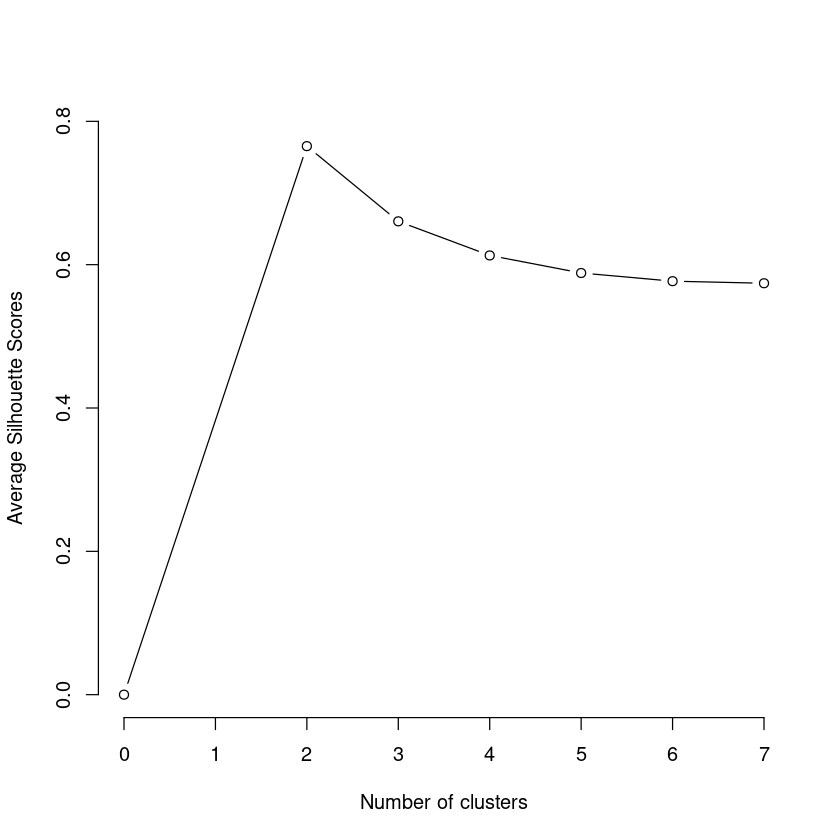

In [18]:
#silhouette method
avg_silhouette_score <- function(k){
  km <- kmeans(iris[, 3:4], centers = k, nstart=20)
  ss <- silhouette(km$cluster, dist(iris[, 3:4], "euclidean"))
  mean(ss[, 3])
}
k <- 2:7 #minimum number of clusters for silhouette scores is 2 for between-cluster variation
avg_sil <- sapply(k, avg_silhouette_score)
k <- c(0, k)
avg_sil <- c(0, avg_sil)
plot(k, avg_sil, type='b', , xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE, ylim = c(0,0.8))

## Assignment

0. Using the function defined above, run a K-means analysis for 2 clusters. Compare the table for membership within clusters and membership within species for this analysis to the table from the k=3 analysis. Do you notice anything interesting? 

Food for thought: what biological reason might there be that versicolor and virginica are getting clustered together?

1. Read in the file `../data/spending_data_byschool.csv` and make a new Data.Frame out of the columns `income_thousands` & `spending_score_1to100`.

    (A) Perform centroid hierarchical clustering on the dataset and visualize it in a dendogram.

    (B) Perform UPGMA hierarchical clustering on the dataset and visualize it in a dendogram.

2. Choose one of the above methods. Cut the dendogram using cutree into k=2 clusters. Create a table that compares the clustering to the school of each customer (refer back to the original data). Is there reason to believe the data is dependent on school? Why or why not?

3. Perform a K-means analysis, from 1 to 10 clusters. Create an elbow plot. Which value does the plot suggest is the optimal number of clusters?

4. Perform a K-means analysis, up to 10 clusters. Create a silhouette plot (recall the minimum number of clusters needed for this kind of plot). Does this value agree with the value from question 3?